# **The Fake News Detector**

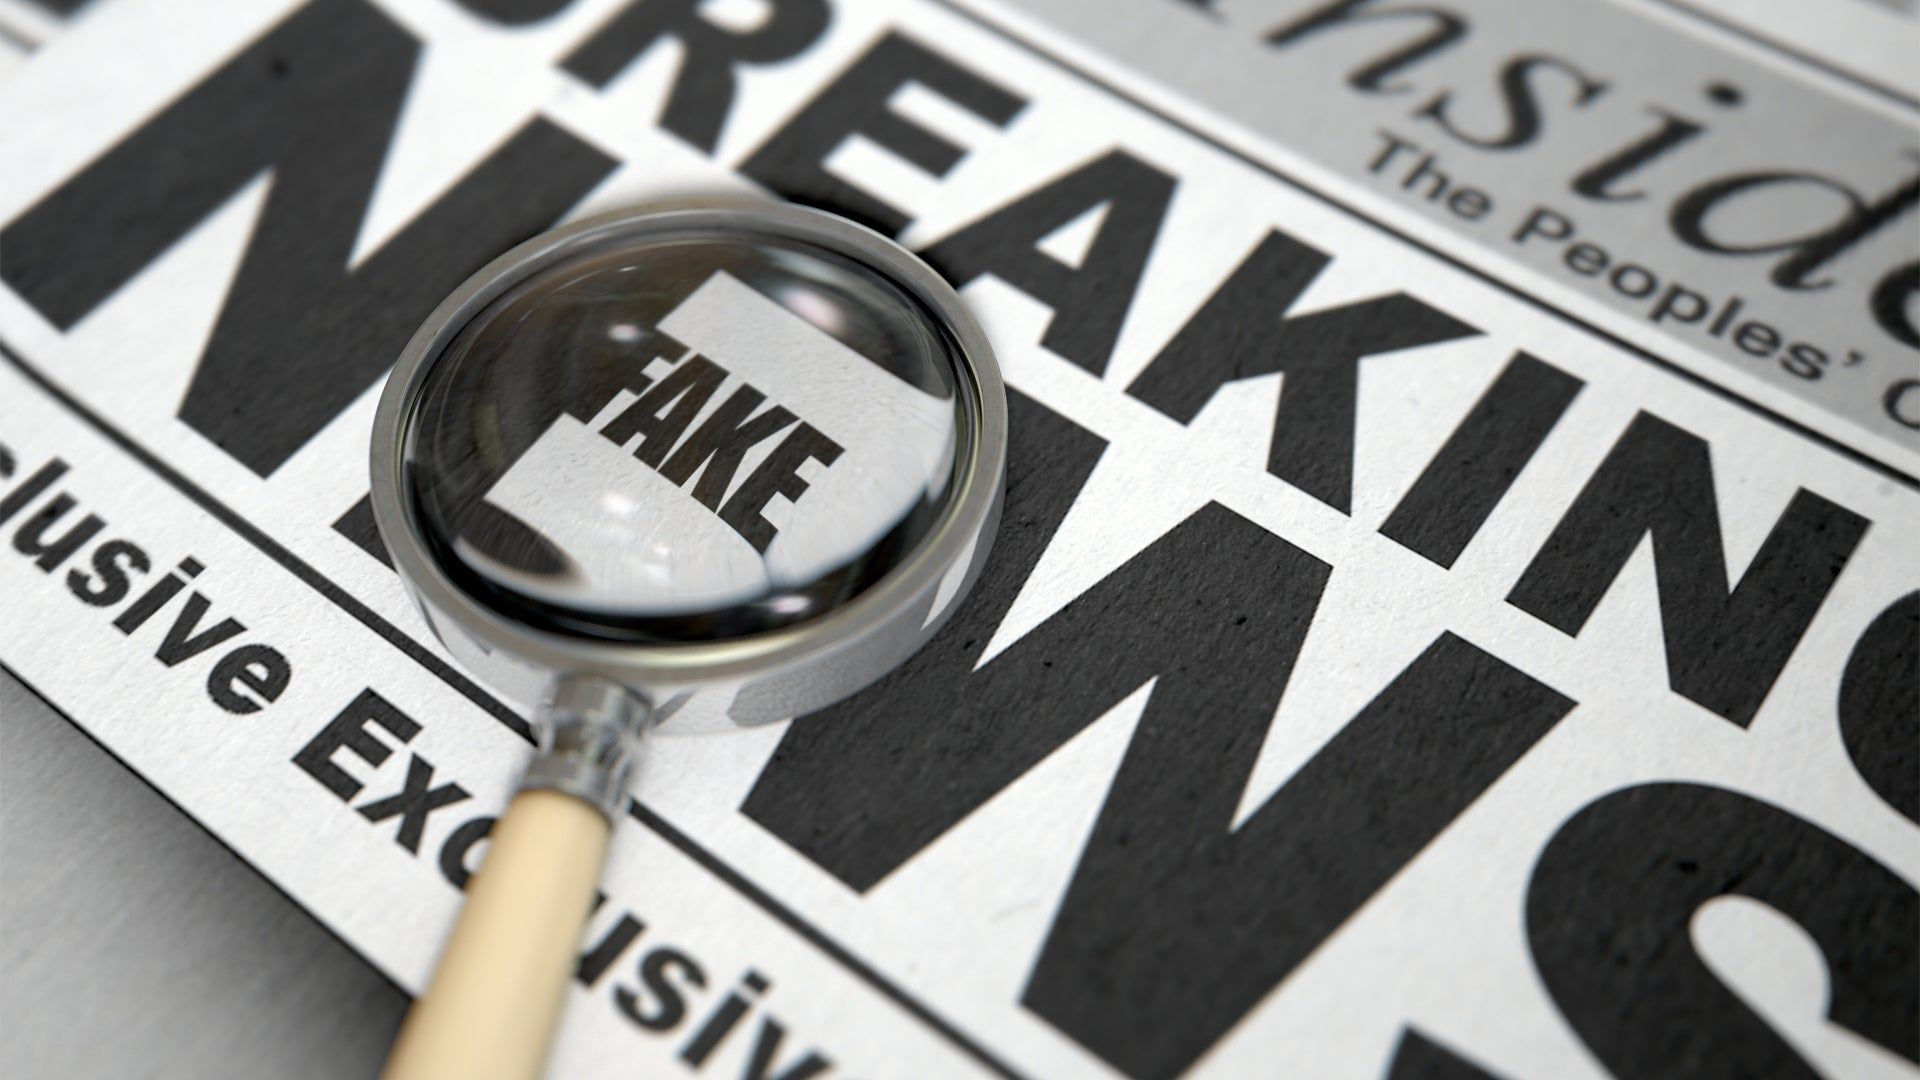

### **Importing all the necessary libraries**

In [ ]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix, ConfusionMatrixDisplay

import re

### **Loading the dataset**

In [ ]:
train = pd.read_csv("train.csv")

### **A glimpse of the data**

In [ ]:
print("Training:")
print(train.head())

Training:
   id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1  Ever get the feeling your life circles the rou...      0  
2  Why the Truth Might Get You Fired October 29, ...      1  
3  Videos 15 Civilians Killed In Single US Airstr...      1  
4  Print \nAn Iranian woman has been sentenced to...      1  


### **Performing data preprocessing**

In [ ]:
train.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
(train.isna().sum()/len(train)) * 100

id        0.000000
title     2.682692
author    9.408654
text      0.187500
label     0.000000
dtype: float64

Since the percentage of missing data is minute, we will drop it

**Dropping null values**

In [ ]:
train.dropna(inplace = True)

**Keeping only the important columns - 'text' and 'label'**

In [ ]:
train.drop(['id', 'title', 'author'], axis = 1, inplace = True)

**Separating feature and label**

In [ ]:
X = train.drop('label', axis = 1)
y = train['label']

### **Performing text preprocessing using NLP**

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

**Applying porter stemmer**

In [ ]:
ps = PorterStemmer()
corpus = []

for text in X['text']:
    Text = re.sub(r"[^a-zA-Z]", " ", text) #Substituting all special characters with space
    Text = Text.lower() #To avoid getting duplicate data
    Text = Text.split() #Splitting each word
    Text = [ps.stem(word) for word in Text if word not in stopwords.words('english')] #stemming each word if it is not a stopword
    Text = " ".join(Text) #Converting it back to a single string
    corpus.append(Text)


**Converting textual data into numerical data**

Using tf-idf vectorizer

In [ ]:
tfidf = TfidfVectorizer(ngram_range=(1,3))
tfidf_X = tfidf.fit_transform(corpus)

Using count vectorizer

In [ ]:
countV = CountVectorizer(ngram_range=(1,3))
countv_X = countV.fit_transform(corpus)

### **Splitting data into training and test sets**

**For tf-idf vectorized data**

In [ ]:
X_traintf, X_testtf, y_traintf, y_testtf = train_test_split(tfidf_X, y, test_size = 0.33, random_state = 53)

**For count vectorized data**

In [ ]:
X_traincv, X_testcv, y_traincv, y_testcv = train_test_split(countv_X, y, test_size = 0.33, random_state = 53)

### **Model building**

**1. Naive Bayes Classifier**

With tf-idf vectorized data

In [ ]:
for alpha in np.arange(0, 1, 0.05):
  tfidf_NB = MultinomialNB(alpha = alpha)
  tfidf_NB.fit(X_traintf, y_traintf)
  pred = tfidf_NB.predict(X_testtf)
  score_tfidf_NB = accuracy_score(y_testtf, pred)
  print("Alpha: {:.2f} Score: {:.5f}".format(alpha, score_tfidf_NB))


/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


Alpha: 0.00 Score: 0.91765
Alpha: 0.05 Score: 0.93355
Alpha: 0.10 Score: 0.89180
Alpha: 0.15 Score: 0.86031
Alpha: 0.20 Score: 0.83911
Alpha: 0.25 Score: 0.82502
Alpha: 0.30 Score: 0.80928
Alpha: 0.35 Score: 0.79751
Alpha: 0.40 Score: 0.78459
Alpha: 0.45 Score: 0.77581
Alpha: 0.50 Score: 0.76620
Alpha: 0.55 Score: 0.75758
Alpha: 0.60 Score: 0.75145
Alpha: 0.65 Score: 0.74548
Alpha: 0.70 Score: 0.74035
Alpha: 0.75 Score: 0.73505
Alpha: 0.80 Score: 0.73107
Alpha: 0.85 Score: 0.72593
Alpha: 0.90 Score: 0.72312
Alpha: 0.95 Score: 0.71947


In [ ]:
tfidf_NB = MultinomialNB(alpha = 0.05)
tfidf_NB.fit(X_traintf, y_traintf)
pred = tfidf_NB.predict(X_testtf)
score_tfidf_NB = accuracy_score(y_testtf, pred)
confusion_matrix_tfidf_NB = confusion_matrix(y_testtf, pred)
print(score_tfidf_NB)
#print(confusion_matrix_tfidf_NB)

0.9335542667771334


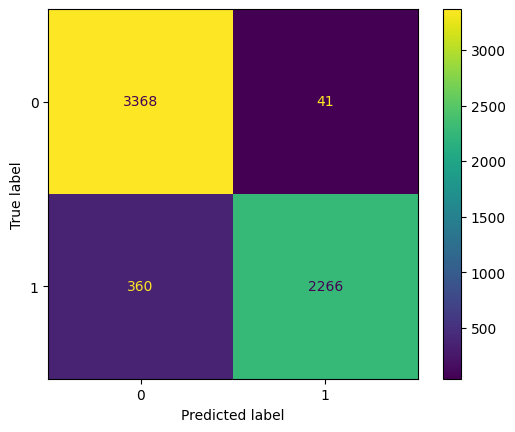

In [ ]:
ConfusionMatrixDisplay.from_estimator(tfidf_NB,X_testtf, y_testtf)

With count vectorized data

In [ ]:
for alpha in np.arange(0, 1, 0.05):
  countv_NB = MultinomialNB(alpha = alpha)
  countv_NB.fit(X_traincv, y_traincv)
  nb_pred = countv_NB.predict(X_testcv)
  score_countv_NB = accuracy_score(y_testcv, nb_pred)
  print("Alpha: {:.2f} Score: {:.5f}".format(alpha, score_countv_NB))

/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


Alpha: 0.00 Score: 0.91798
Alpha: 0.05 Score: 0.91798
Alpha: 0.10 Score: 0.91400
Alpha: 0.15 Score: 0.91616
Alpha: 0.20 Score: 0.91964
Alpha: 0.25 Score: 0.92444
Alpha: 0.30 Score: 0.92908
Alpha: 0.35 Score: 0.93140
Alpha: 0.40 Score: 0.93521
Alpha: 0.45 Score: 0.93803
Alpha: 0.50 Score: 0.93985
Alpha: 0.55 Score: 0.94068
Alpha: 0.60 Score: 0.94035
Alpha: 0.65 Score: 0.94283
Alpha: 0.70 Score: 0.94118
Alpha: 0.75 Score: 0.94217
Alpha: 0.80 Score: 0.94234
Alpha: 0.85 Score: 0.94118
Alpha: 0.90 Score: 0.94118
Alpha: 0.95 Score: 0.93869


In [ ]:
countv_NB = MultinomialNB(alpha = 0.65)
countv_NB.fit(X_traincv, y_traincv)
nb_pred = countv_NB.predict(X_testcv)
score_countv_NB = accuracy_score(y_testcv, nb_pred)
confusion_matrix_countv_NB = confusion_matrix(y_testcv, nb_pred)
print(score_countv_NB)
#print(confusion_matrix_countv_NB)

0.9428334714167357


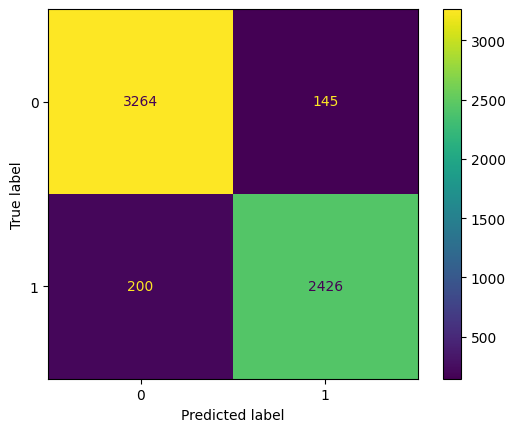

In [ ]:
ConfusionMatrixDisplay.from_estimator(countv_NB,X_testcv, y_testcv)

**2. Logistic Regression**

In [ ]:
lr = LogisticRegression()
lr.fit(X_traincv, y_traincv)
lr_pred = lr.predict(X_testcv)
score_lr = accuracy_score(y_testcv, lr_pred)
confusion_matrix_lr = confusion_matrix(y_testcv, lr_pred)
print(score_lr)
#print(confusion_matrix_lr)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9554266777133389
[[3271  138]
 [ 131 2495]]


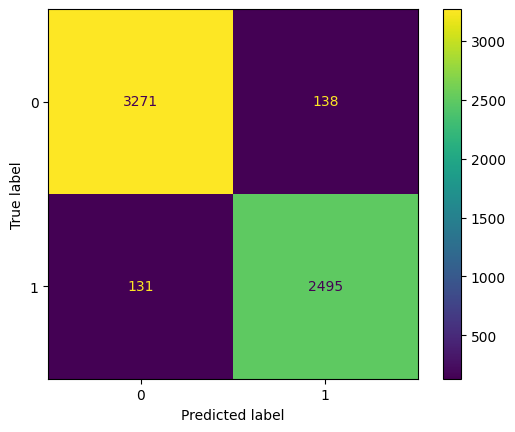

In [ ]:
ConfusionMatrixDisplay.from_estimator(lr,X_testcv, y_testcv)

**3. Passive Agressive Classifier**

In [ ]:
pac = PassiveAggressiveClassifier(max_iter = 10)
pac.fit(X_traintf, y_traintf)
pac_pred = pac.predict(X_testtf)
score_pac = accuracy_score(y_testtf, pac_pred)
confusion_matrix_pac = confusion_matrix(y_testtf, pac_pred)
print(score_pac)
#print(confusion_matrix_pac)

0.9632145816072908


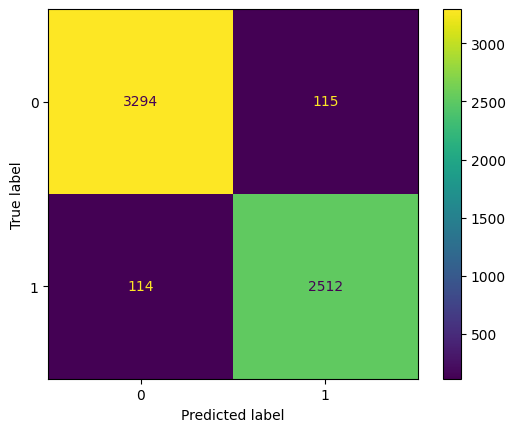

In [ ]:
ConfusionMatrixDisplay.from_estimator(pac,X_testtf, y_testtf)

We will be using Passive Agressive Classifier as our model for predicting as it gave the highest accuracy.

### **Building a driver function**

In [ ]:
def preprocess_text(text):
    ps = PorterStemmer()
    text = re.sub(r"[^a-zA-Z]", " ", text) #Substituting any characters except alphabets with space
    text = text.lower() #To avoid getting duplicate data
    text = text.split() #Splitting each word
    text = [ps.stem(word) for word in text if word not in stopwords.words('english')]
    text = " ".join(text) #Converting it back to a single string
    return text

def predictor(label):
  if label == 1:
    return "Fake News"
  elif label ==0:
    return "Real News"

def test_model():
    user_input = input("Enter a text to predict its label: ")
    processed_text = preprocess_text(user_input)
    text_vectorized = tfidf.transform([processed_text])
    prediction = pac.predict(text_vectorized)
    print("Predicted label:", predictor(prediction[0]))

### **Testing The Fake News Detector**

In [ ]:
test_model()

Enter a text to predict its label: GAZA CITY (PALESTINIAN TERRITORIES) (AFP)  â€”    A Hamas military court on Sunday sentenced two Palestinians to death for drug smuggling in the Gaza Strip, in the first punishment of its kind in the enclave. [â€œThe Gaza military court announced the death penalty for two civilians from Rafah, in the southern Gaza Strip, for selling narcotics,â€ the   interior ministry said in a statement.  It said a third suspect was sentenced to hard labour. Authorities have seized drugs with a street value of around $1 million (900, 000 euros) over the past few months, the ministry said. They seized 1, 250 packets of cannabis and 400 pills of Tramadol  â€”   a powerful   painkiller  â€”   in January alone, it said. Until Sunday, only people guilty of spying for Israel or murder had received the death penalty in Gaza, controlled by Islamist Hamas since 2007. All Palestinian death sentences in theory have to be approved by president Mahmoud Abbas, but Hamas has long

In [ ]:
test_model()

Enter a text to predict its label: By Justin Gardner As the corporatocracy tightens its grip on the masses â€“ finding ever more ways to funnel wealth to the top â€“ humanity... 
Predicted label: Fake News


In [ ]:
test_model()

Enter a text to predict its label: Fatal error : Out of memory (allocated 22544384) (tried to allocate 125880 bytes) in /home/pakalert/public_html/wp-content/plugins/wpseo-local/local-seo.php on line 66
Predicted label: Fake News


In [ ]:
test_model()

Enter a text to predict its label: Prime Minister Justin Trudeau of Canada would like the world to know that he was rather fond of Fidel Castro. Or at least, that is the message that many people took from his unusually warm statement on the death of the Cuban dictator, whom he hailed on Saturday as â€œa remarkable leader. â€ â€œFidel Castro was a larger than life leader who served his people for almost half a century,â€ Mr. Trudeau said in the statement, which was issued while he attended a summit meeting in Madagascar. He described Mr. Castro, who ruled as a Communist autocrat for almost 50 years, as â€œCubaâ€™s longest serving President. â€ â€œWhile a controversial figure, both Mr. Castroâ€™s supporters and detractors recognized his tremendous dedication and love for the Cuban people who had a deep and lasting affection for â€˜el Comandante,â€™â€ Mr. Trudeau continued. He added that Mr. Castro was â€œa legendary revolutionary and oratorâ€ whose death had brought him â€œdeep sorr